# Setup and Loading the Dataset


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df=pd.read_csv("Amazon Sales data.csv")   # Loading the dataset

In [35]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


# ETL (Extract, Transform, Load)

In [36]:
df['Order Date'] = pd.to_datetime(df['Order Date'])        #Convert Dates to Datetime Format
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [37]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02


In [38]:
df['Year'] = df['Order Date'].dt.year                            #Extract Month and Year
df['Month'] = df['Order Date'].dt.month
df['Year_Month'] = df['Order Date'].dt.to_period('M')


In [39]:
# Check for missing values                                        #Handle Missing Data
print(df.isnull().sum())

# Drop or fill missing values if any
df.dropna(inplace=True)  # or df.fillna(value, inplace=True)


Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
Year              0
Month             0
Year_Month        0
dtype: int64


In [40]:
df['Units Sold'] = pd.to_numeric(df['Units Sold'], errors='coerce')             #Data Transformation
df['Unit Price'] = pd.to_numeric(df['Unit Price'], errors='coerce')
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')
# Repeat for other necessary columns


# Sales Trend Analysis

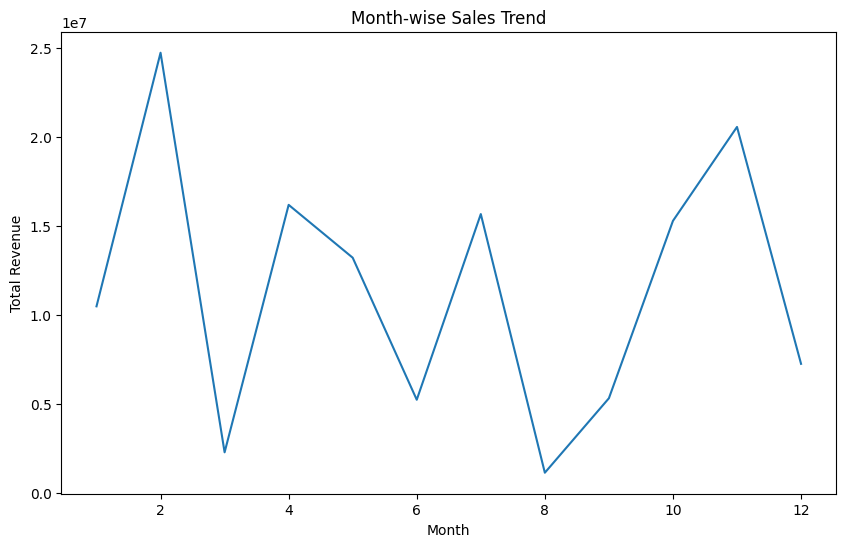

In [41]:
monthly_sales = df.groupby('Month').agg({'Total Revenue': 'sum'})            #Month-wise Sales Trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x=monthly_sales.index, y='Total Revenue')
plt.title('Month-wise Sales Trend')
plt.show()


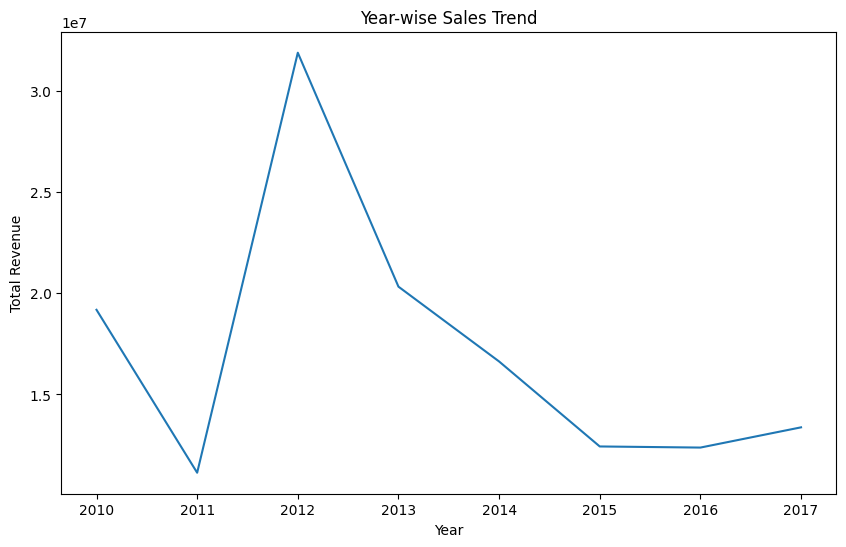

In [42]:
yearly_sales = df.groupby('Year').agg({'Total Revenue': 'sum'})              #Year-wise Sales Trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sales, x=yearly_sales.index, y='Total Revenue')
plt.title('Year-wise Sales Trend')
plt.show()


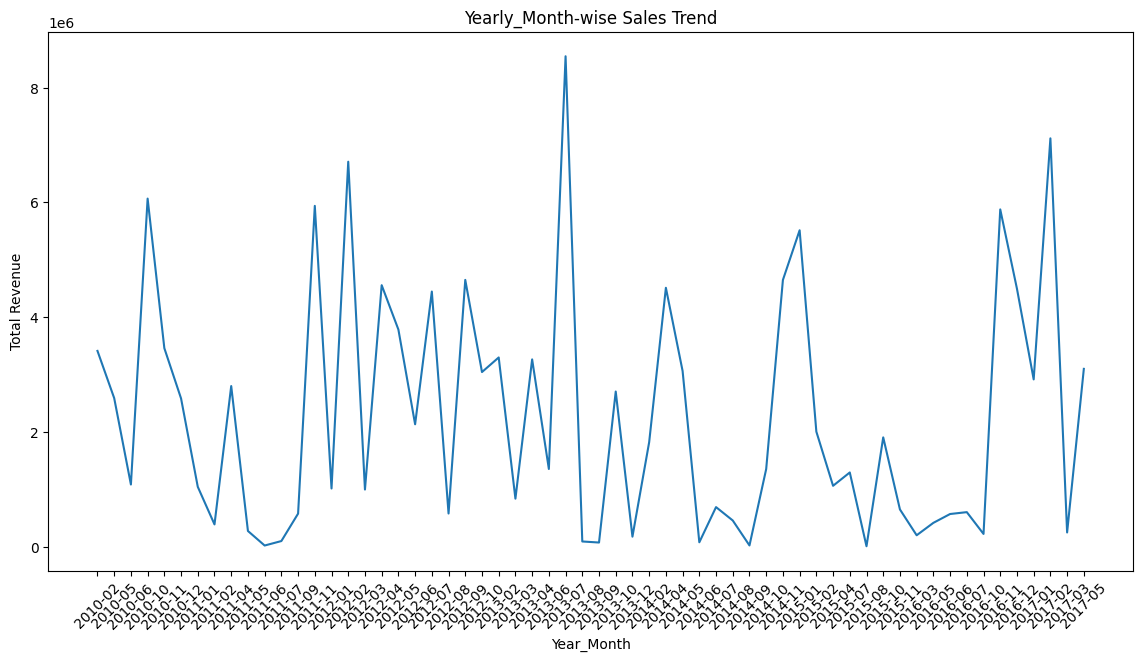

In [43]:
yearly_monthly_sales = df.groupby('Year_Month').agg({'Total Revenue': 'sum'})  #Yearly_Month-wise Sales Trend
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_monthly_sales, x=yearly_monthly_sales.index.astype(str), y='Total Revenue')
plt.title('Yearly_Month-wise Sales Trend')
plt.xticks(rotation=45)
plt.show()


# Key Metrics & Factors

In [44]:
top_products = df.groupby('Item Type').agg({'Total Revenue': 'sum'}).sort_values(by='Total Revenue', ascending=False) #Top Products by Revenue
print(top_products.head(10))


                 Total Revenue
Item Type                     
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Cereal              5322898.90
Meat                4503675.75
Personal Care       3980904.84
Vegetables          3089057.06
Beverages           2690794.60


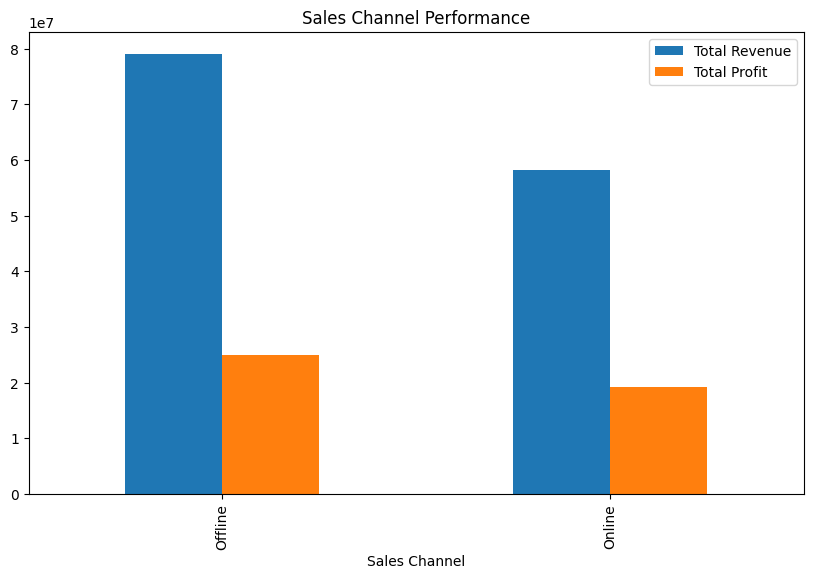

In [45]:
sales_channel = df.groupby('Sales Channel').agg({'Total Revenue': 'sum', 'Total Profit': 'sum'}) #Sales Channels Performance
sales_channel.plot(kind='bar', figsize=(10, 6), title='Sales Channel Performance')
plt.show()


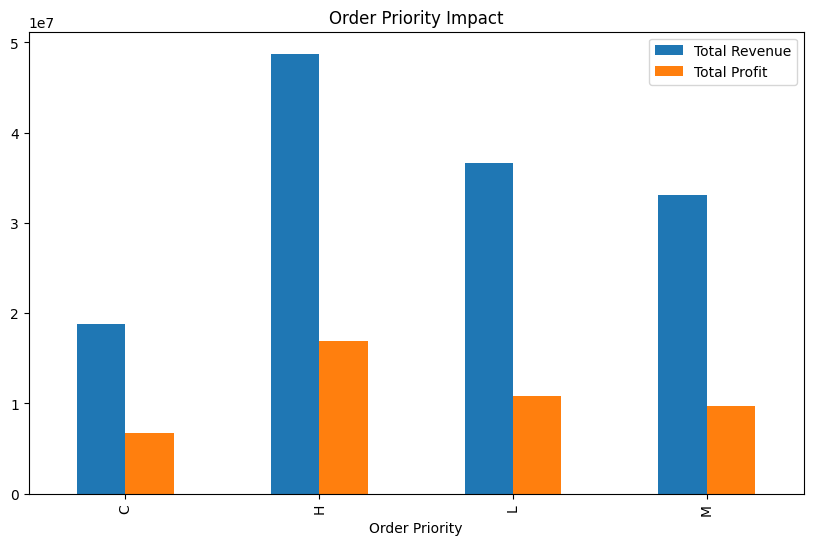

In [46]:
order_priority = df.groupby('Order Priority').agg({'Total Revenue': 'sum', 'Total Profit': 'sum'}) #Order Priority Impact
order_priority.plot(kind='bar', figsize=(10, 6), title='Order Priority Impact')
plt.show()


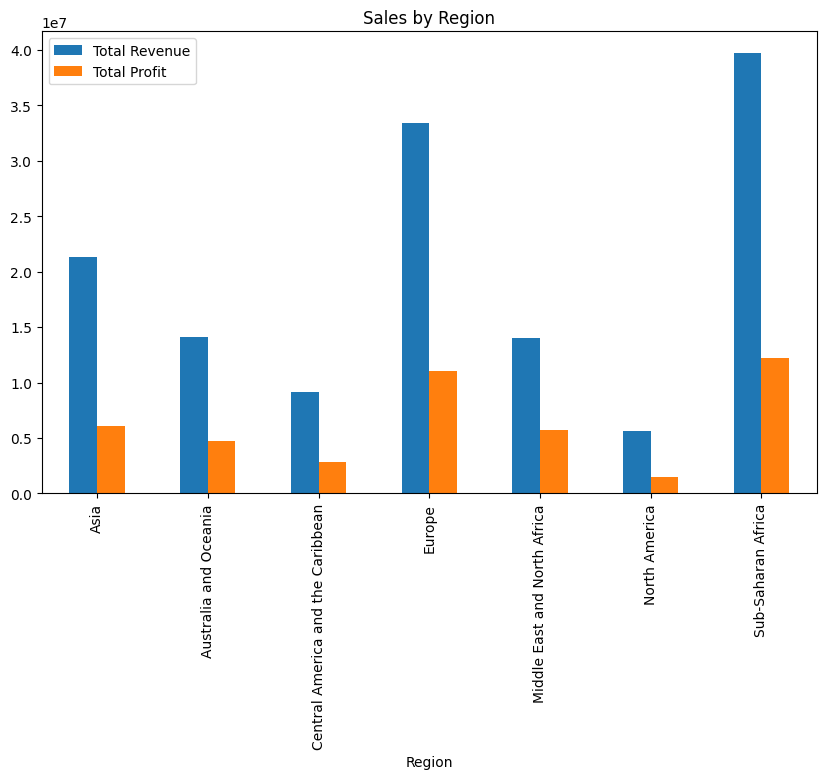

In [47]:
region_sales = df.groupby('Region').agg({'Total Revenue': 'sum', 'Total Profit': 'sum'}) #Geographical Analysis
region_sales.plot(kind='bar', figsize=(10, 6), title='Sales by Region')
plt.show()


#  Relationships Between Attributes

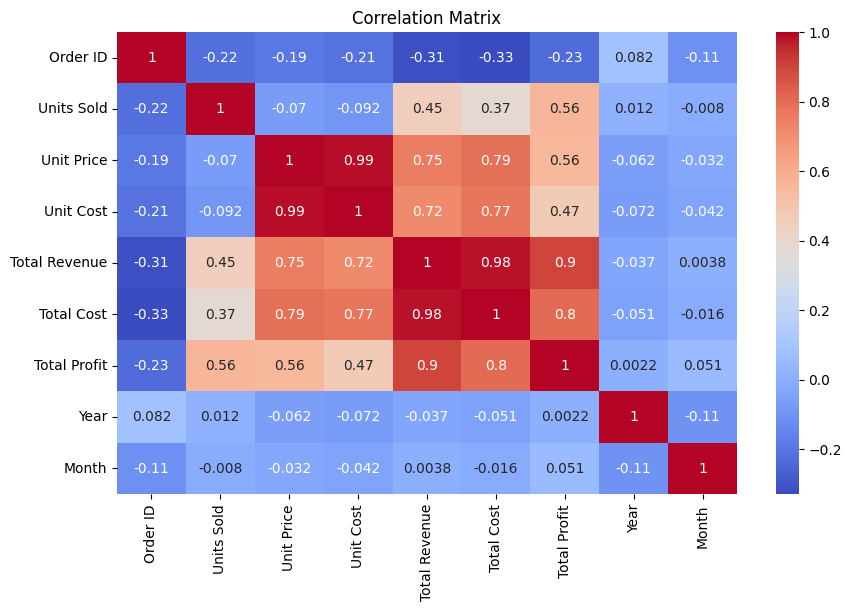

In [48]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['number'])                #Correlation Analysis

# Now generate the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



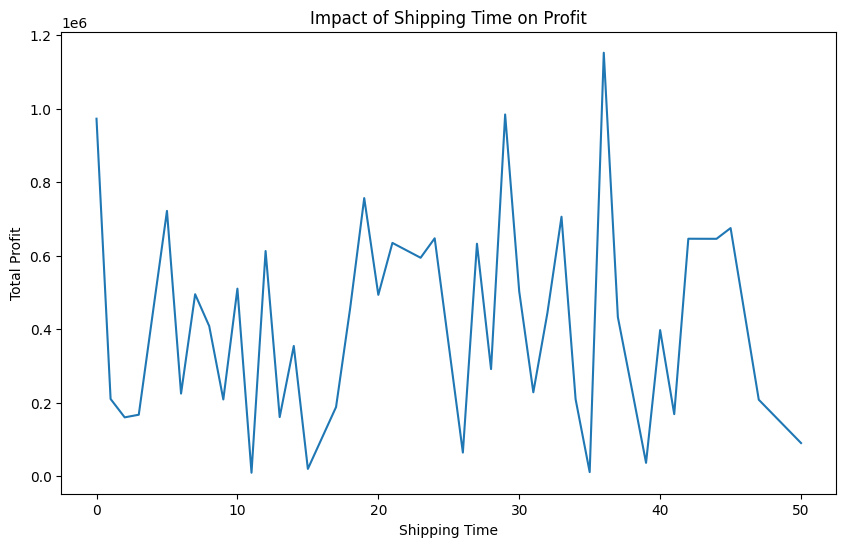

In [49]:
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days                 #Time to Ship Analysis
shipping_impact = df.groupby('Shipping Time').agg({'Total Profit': 'mean'})
plt.figure(figsize=(10, 6))
sns.lineplot(data=shipping_impact, x=shipping_impact.index, y='Total Profit')
plt.title('Impact of Shipping Time on Profit')
plt.show()


# Visualization and Reporting

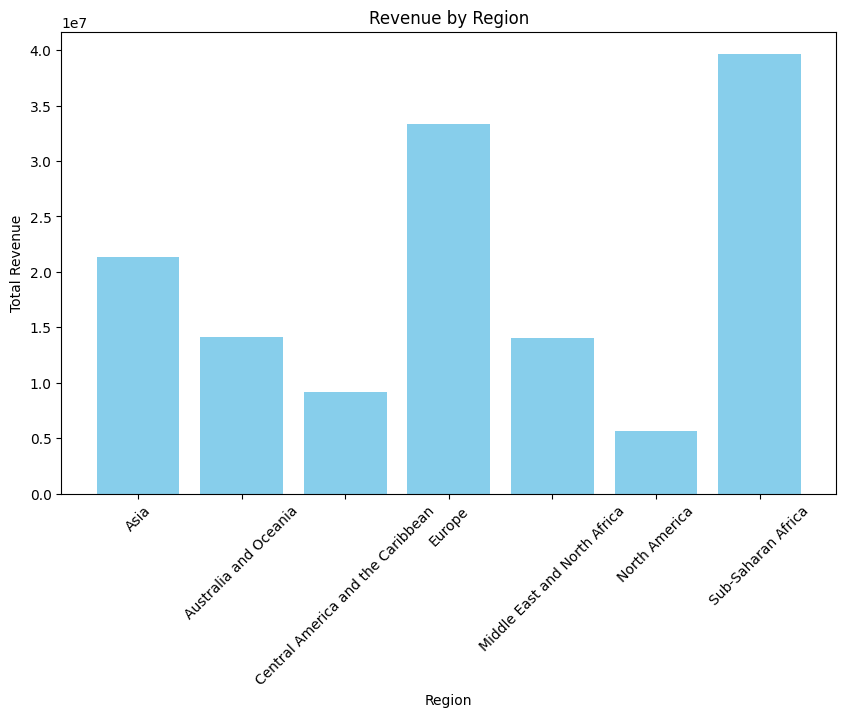

In [50]:
import matplotlib.pyplot as plt

# Assuming 'region_sales' is your DataFrame and it contains 'Total Revenue'
plt.figure(figsize=(10, 6))
plt.bar(region_sales.index, region_sales['Total Revenue'], color='skyblue')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()
